# Import Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Data Loading

In [5]:
base_dir='garbage_classification'
class_labels=os.listdir(base_dir)
class_labels.sort()
print(class_labels)

['battery', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'plastic', 'shoes', 'white-glass']


In [6]:
for label in class_labels:
    path=os.path.join(base_dir,label)
    size=len(os.listdir(path))
    print(f'Target name: {label}, number of samples in data: {size}')

Target name: battery, number of samples in data: 946
Target name: brown-glass, number of samples in data: 608
Target name: cardboard, number of samples in data: 892
Target name: clothes, number of samples in data: 5326
Target name: green-glass, number of samples in data: 630
Target name: metal, number of samples in data: 770
Target name: plastic, number of samples in data: 872
Target name: shoes, number of samples in data: 1988
Target name: white-glass, number of samples in data: 776


In [7]:
data=[]
class_name=0
for label in class_labels:
    path=os.path.join(base_dir,label)
    print(f'images loading from the following path: {path}')
    files=os.listdir(path)
    if len(files)>1000:
        files=files[:1000]
    for sample in files:
        filepath=os.path.join(path,sample)
        try:
            image=cv2.imread(filepath)
            image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image=cv2.resize(image,(128,128))
            image=np.array(image)
            image=image/255.0
            data.append([image,class_name])
        except:
            continue
    class_name+=1

images loading from the following path: garbage_classification/battery
images loading from the following path: garbage_classification/brown-glass
images loading from the following path: garbage_classification/cardboard
images loading from the following path: garbage_classification/clothes
images loading from the following path: garbage_classification/green-glass
images loading from the following path: garbage_classification/metal
images loading from the following path: garbage_classification/plastic
images loading from the following path: garbage_classification/shoes
images loading from the following path: garbage_classification/white-glass


In [8]:
X,y=zip(*data)
X=np.array(X)
y=np.array(y)
print(X.shape,y.shape)

(7485, 128, 128, 3) (7485,)


In [9]:
+X[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [10]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

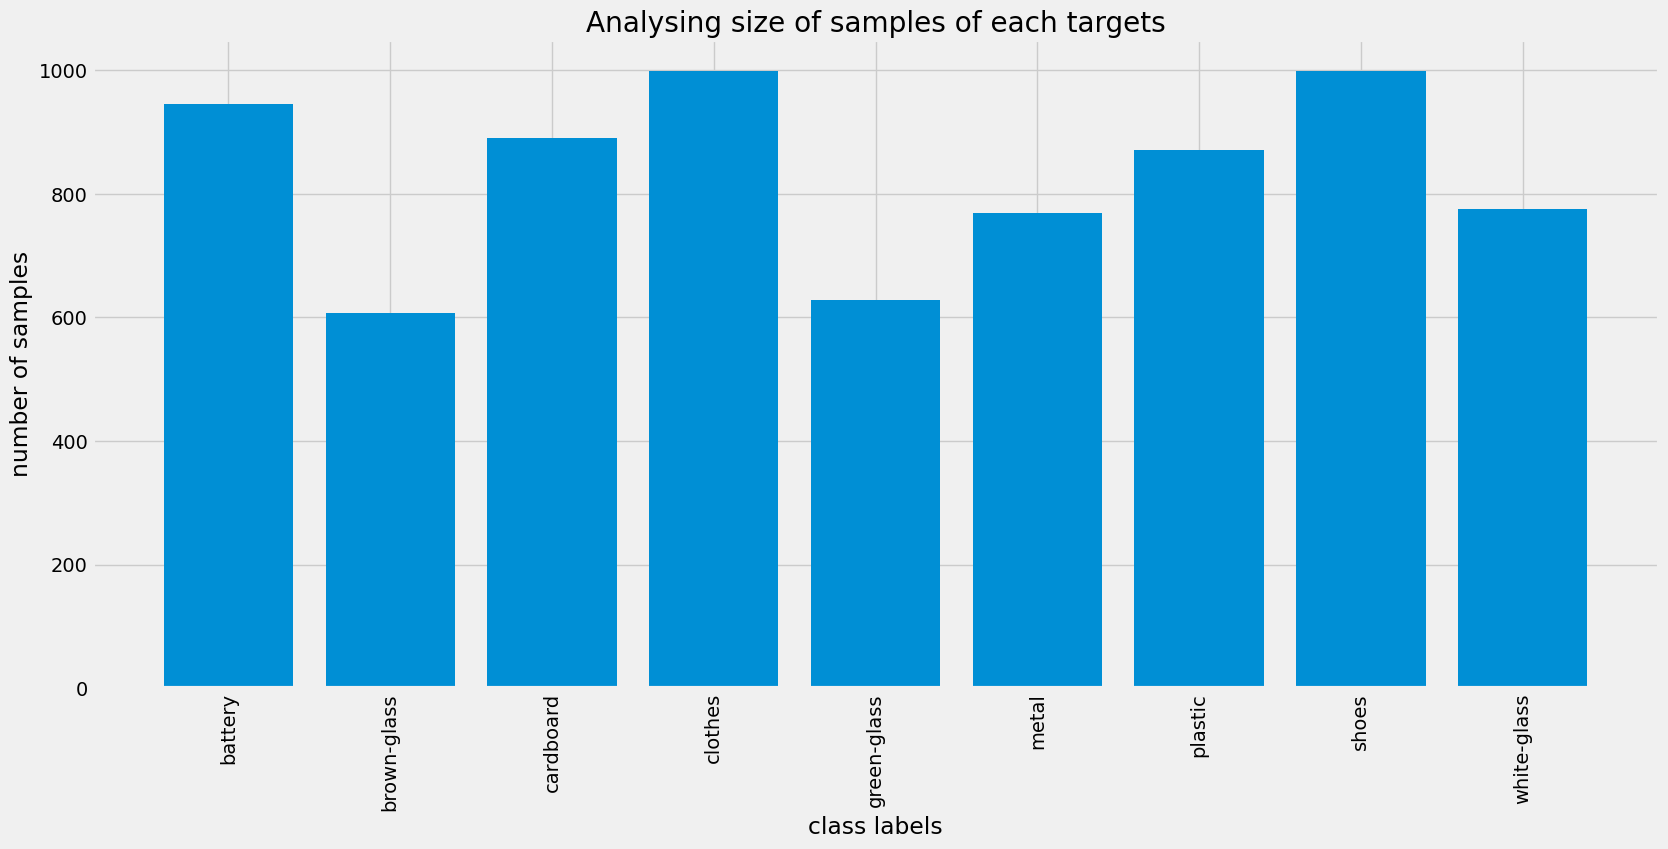

In [11]:
num_labels,size=np.unique(y,return_counts=True)
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.bar(x=class_labels,
            height=size)
    plt.title(label='Analysing size of samples of each targets')
    plt.xlabel(xlabel='class labels')
    plt.ylabel(ylabel='number of samples')
    plt.xticks(rotation=90)
    plt.show()

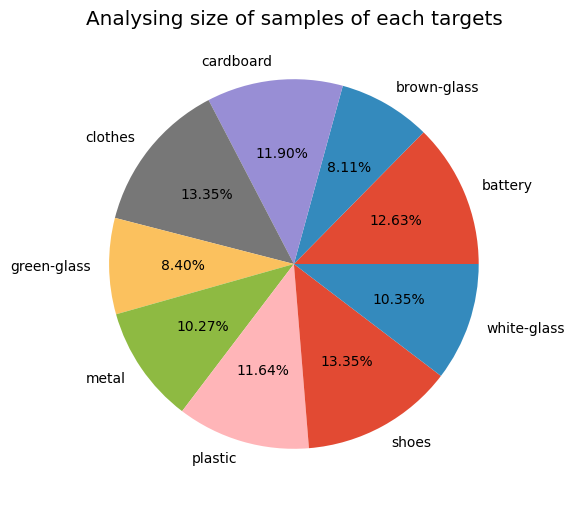

In [12]:
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(6,6))
    plt.pie(labels=class_labels,
            x=size,
            autopct='%.2f%%')
    plt.title(label='Analysing size of samples of each targets')
    plt.show()

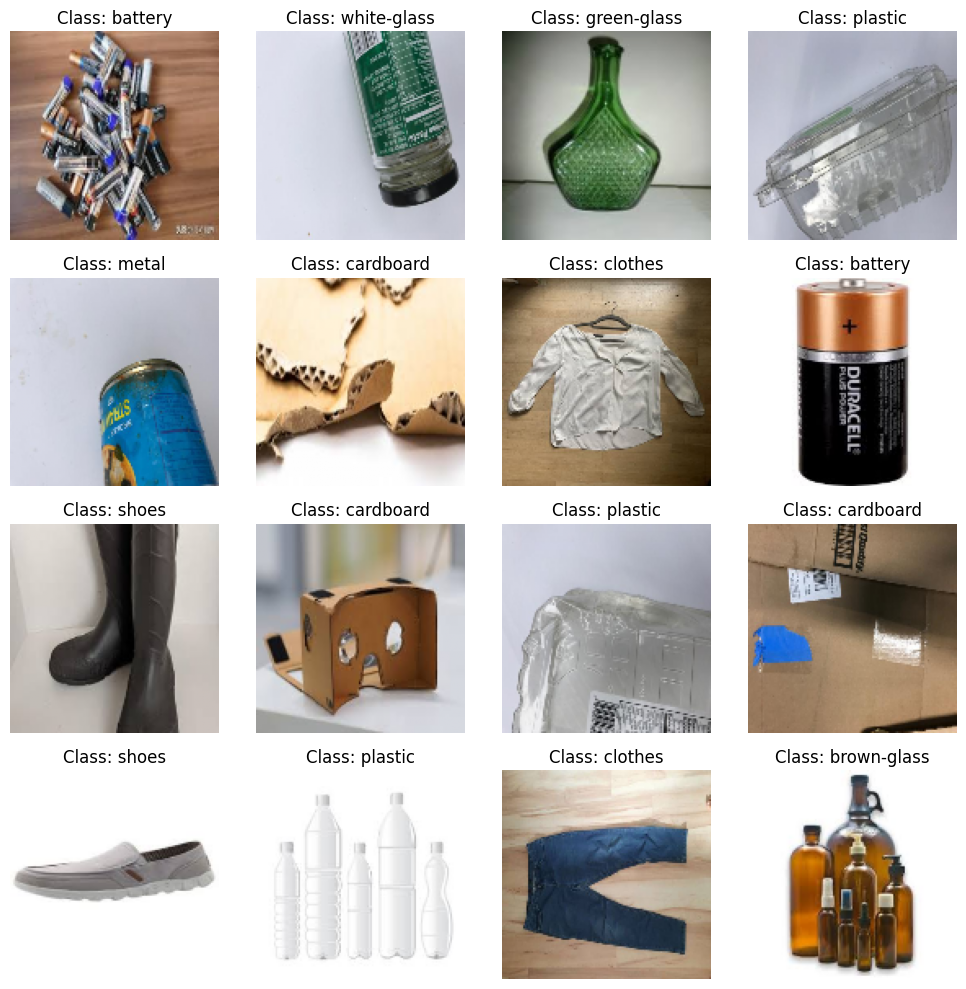

In [13]:
from random import randint

def show_images(images,labels,str_labels):
    plt.figure(figsize=(10,10))
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        idx=randint(0,len(images)-1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(label=f"Class: {str_labels[labels[idx]]}")
    plt.tight_layout()
    plt.show()
show_images(X,y,class_labels)

# Data Splitting

In [14]:
y=to_categorical(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5988, 128, 128, 3) (1497, 128, 128, 3) (5988, 9) (1497, 9)


# Algorithm: DenseNet201LSTM

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed, Flatten, Dense, Dropout, Input,LSTM
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

In [16]:
densenet = DenseNet201(include_top=False, weights='imagenet', input_shape=(128,128,3))
densenet.trainable = False

74836368/74836368 [==============================] - 3s 0us/step


In [17]:
input_tensor=densenet.input
x = TimeDistributed(Flatten())(densenet.output)
x = TimeDistributed(Dropout(0.3))(x)
x = TimeDistributed(Dense(512, activation='relu'))(x)
x = LSTM(200)(x)
x = Dense(len(class_labels), activation='softmax')(x)
densenet_model = Model(inputs=input_tensor, outputs=x)

In [18]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [19]:
densenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

***Model training***

In [20]:
history=densenet_model.fit(x=X_train,y=y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/20
188/188 [==============================] - 44s 111ms/step - loss: 0.6357 - accuracy: 0.8111 - val_loss: 0.3436 - val_accuracy: 0.8798
Epoch 2/20
188/188 [==============================] - 13s 69ms/step - loss: 0.2442 - accuracy: 0.9285 - val_loss: 0.3021 - val_accuracy: 0.8951
Epoch 3/20
188/188 [==============================] - 13s 69ms/step - loss: 0.1629 - accuracy: 0.9481 - val_loss: 0.2820 - val_accuracy: 0.9031
Epoch 4/20
188/188 [==============================] - 13s 69ms/step - loss: 0.1098 - accuracy: 0.9686 - val_loss: 0.2729 - val_accuracy: 0.9065
Epoch 5/20
188/188 [==============================] - 13s 70ms/step - loss: 0.0719 - accuracy: 0.9813 - val_loss: 0.2764 - val_accuracy: 0.9051
Epoch 6/20
188/188 [==============================] - 13s 70ms/step - loss: 0.0500 - accuracy: 0.9875 - val_loss: 0.2753 - val_accuracy: 0.9071
Epoch 7/20
188/188 [==============================] - 13s 71ms/step - loss: 0.0349 - accuracy: 0.9938 - val_loss: 0.2726 - val_accuracy

***Accuracy and Loss plot-graphs***

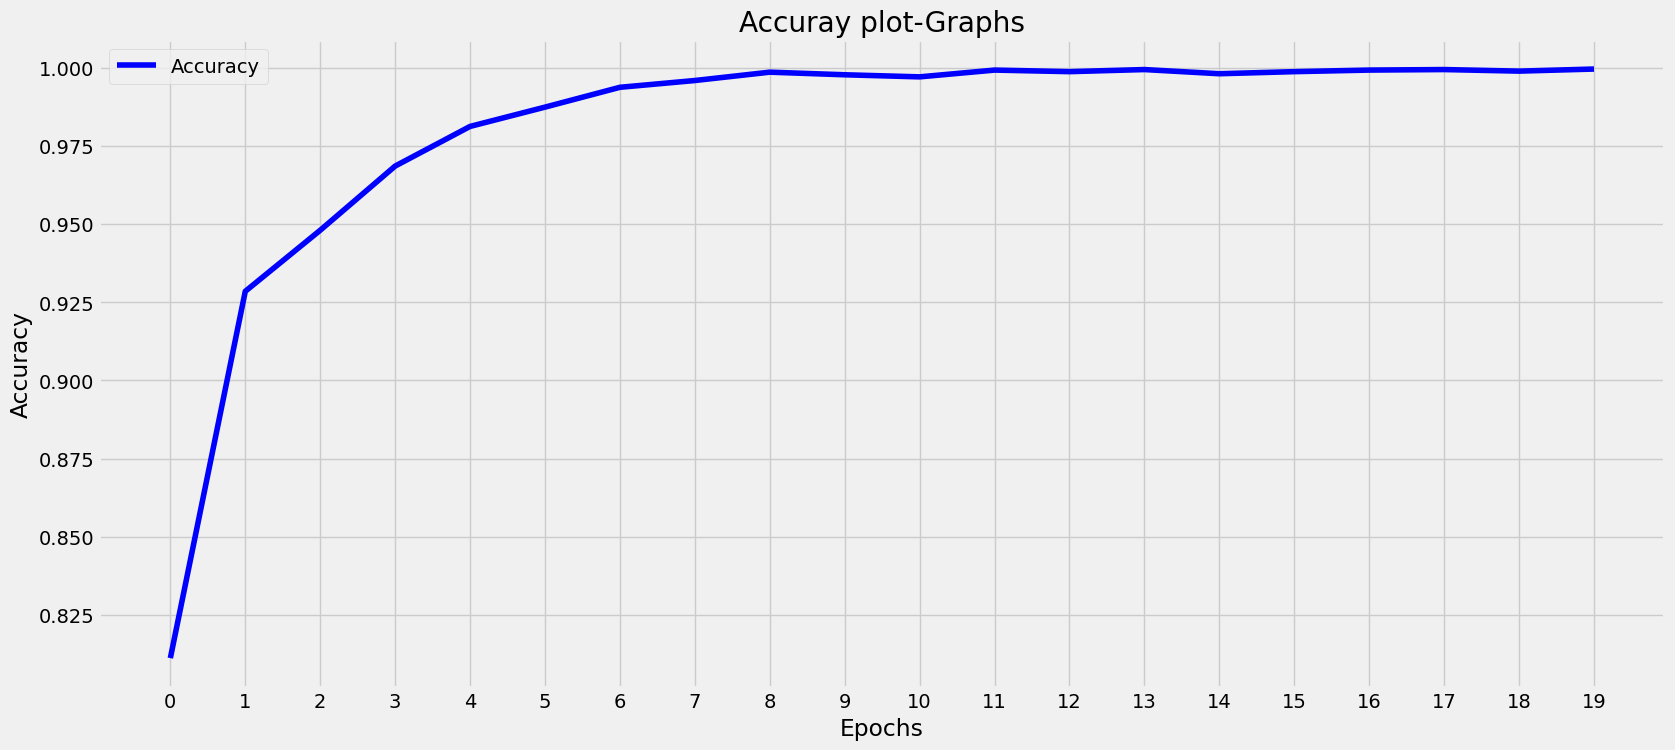

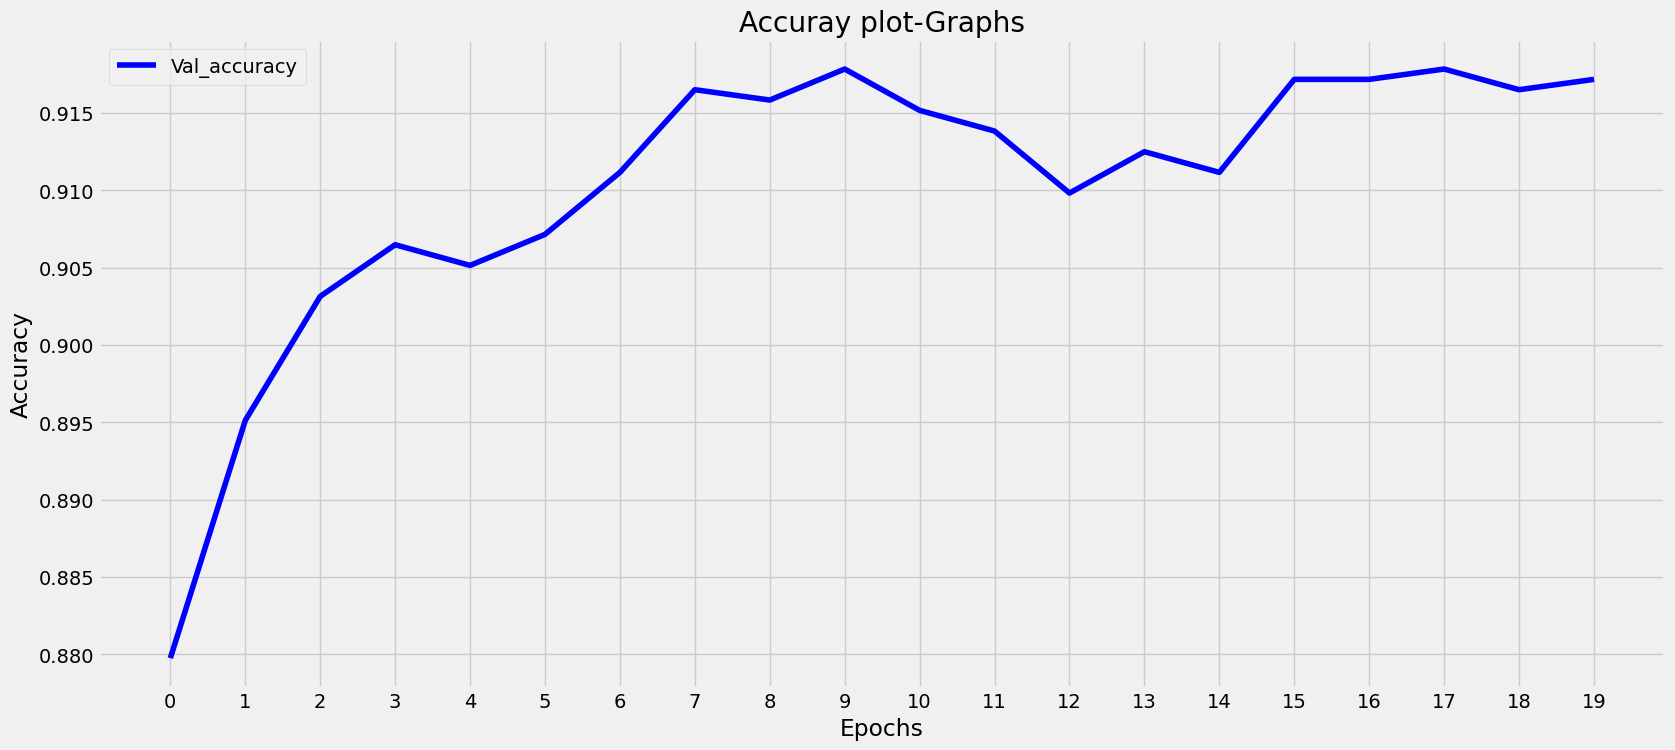

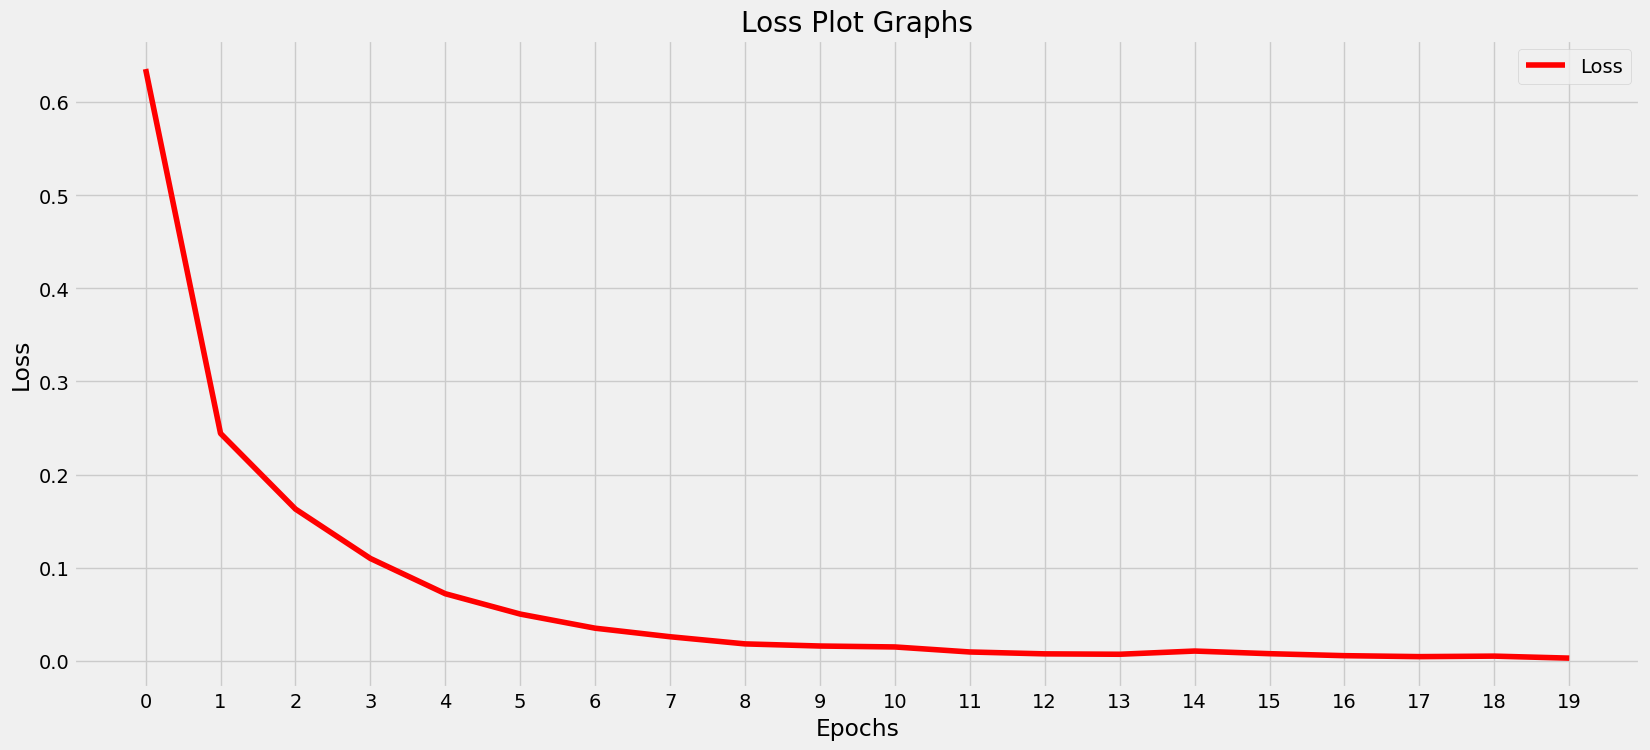

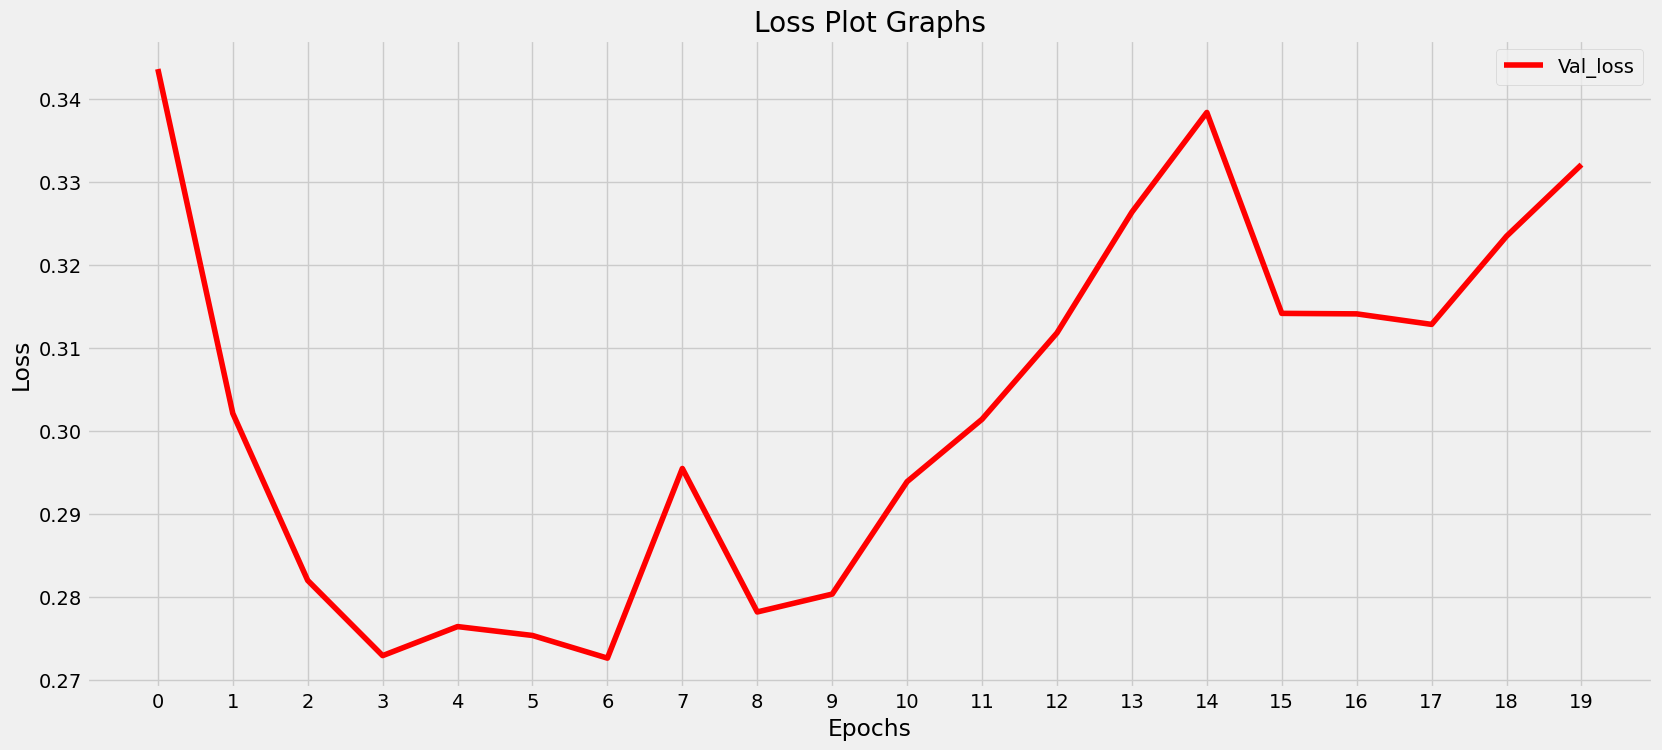

In [21]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.plot(history.history["accuracy"],color='blue')
    plt.title("Accuray plot-Graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy')
    plt.legend(labels=["Accuracy"])
    plt.xticks(range(20))
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["val_accuracy"], color='blue')
    plt.title("Accuray plot-Graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy')
    plt.legend(labels=["Val_accuracy"])
    plt.xticks(range(20))
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["loss"],color='red')
    plt.title("Loss Plot Graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss')
    plt.legend(labels=["Loss"])
    plt.xticks(range(20))
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["val_loss"], color='red')
    plt.title("Loss Plot Graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss')
    plt.legend(labels=["Val_loss"])
    plt.xticks(range(20))
    plt.show()

In [22]:
densenet_pred = densenet_model.predict(X_test,batch_size=32,verbose=1)

47/47 [==============================] - 6s 52ms/step


In [23]:
print(densenet_pred)

[[1.9548482e-07 5.1158031e-07 9.9999654e-01 ... 1.7268562e-07
  8.3388920e-07 1.2081617e-07]
 [2.3160365e-01 3.8093673e-03 1.9013787e-03 ... 3.9901650e-05
  1.1120506e-03 2.4641055e-04]
 [9.9981683e-01 1.2202997e-04 4.5862353e-06 ... 3.6082461e-08
  5.8162746e-06 2.7812680e-06]
 ...
 [1.1337332e-03 8.4093081e-05 8.9873158e-04 ... 8.5960953e-03
  2.1714652e-01 1.2883861e-03]
 [1.4545531e-06 7.4221822e-07 7.5836724e-05 ... 1.7734315e-07
  9.9990571e-01 3.3614219e-06]
 [9.9998856e-01 4.2867237e-07 3.6366923e-06 ... 3.0283352e-06
  1.2505906e-07 4.2902903e-07]]


In [24]:
pred = np.argmax(densenet_pred,axis=1)
actual = np.argmax(y_test,axis=1)

In [25]:
print(pred.tolist())

[2, 5, 0, 1, 4, 7, 7, 0, 5, 5, 3, 6, 0, 2, 4, 0, 3, 1, 6, 8, 5, 6, 7, 7, 8, 4, 8, 2, 0, 0, 3, 4, 1, 2, 3, 2, 0, 2, 3, 8, 8, 1, 8, 0, 2, 7, 4, 5, 2, 7, 6, 6, 3, 8, 7, 7, 0, 4, 6, 3, 5, 0, 0, 8, 6, 7, 0, 5, 0, 0, 2, 3, 5, 3, 1, 2, 8, 3, 5, 4, 2, 1, 8, 8, 1, 2, 3, 2, 6, 3, 8, 7, 2, 0, 2, 4, 3, 5, 8, 3, 6, 7, 7, 3, 5, 6, 8, 8, 6, 2, 5, 6, 6, 5, 6, 6, 3, 3, 7, 0, 4, 4, 0, 6, 6, 6, 0, 6, 3, 7, 1, 7, 1, 1, 6, 8, 7, 3, 3, 0, 5, 3, 1, 2, 0, 1, 5, 4, 8, 7, 4, 6, 2, 6, 0, 1, 7, 5, 4, 1, 0, 5, 0, 7, 5, 3, 2, 6, 0, 0, 0, 2, 0, 6, 5, 2, 5, 6, 1, 0, 8, 6, 7, 7, 2, 6, 5, 0, 4, 7, 0, 8, 0, 5, 5, 4, 0, 1, 6, 8, 0, 7, 5, 3, 3, 3, 3, 1, 5, 8, 1, 8, 0, 0, 6, 6, 7, 2, 0, 3, 7, 7, 7, 8, 3, 6, 1, 4, 5, 5, 5, 7, 5, 4, 8, 8, 5, 4, 0, 5, 0, 5, 6, 7, 5, 4, 1, 5, 3, 4, 0, 3, 5, 7, 0, 5, 3, 0, 8, 2, 7, 6, 5, 5, 3, 7, 1, 3, 3, 5, 0, 4, 3, 3, 8, 1, 8, 0, 1, 8, 3, 3, 1, 5, 5, 3, 2, 6, 4, 3, 1, 2, 4, 2, 3, 0, 0, 4, 0, 4, 4, 0, 7, 7, 3, 4, 2, 4, 2, 6, 0, 6, 4, 3, 3, 7, 8, 0, 1, 2, 8, 2, 6, 4, 0, 4, 8, 5, 2, 3, 5, 7, 6, 

In [26]:
print(actual.tolist())

[2, 5, 0, 1, 4, 7, 7, 0, 1, 5, 3, 8, 0, 2, 4, 0, 3, 1, 6, 8, 5, 6, 7, 7, 8, 4, 6, 2, 0, 0, 3, 4, 1, 2, 7, 2, 0, 2, 3, 8, 8, 1, 8, 0, 2, 7, 4, 5, 2, 7, 6, 6, 3, 8, 7, 7, 0, 4, 6, 3, 5, 0, 0, 8, 6, 7, 0, 5, 0, 0, 2, 3, 5, 3, 1, 2, 8, 3, 5, 4, 2, 1, 8, 8, 1, 2, 3, 2, 6, 3, 8, 7, 2, 0, 2, 4, 3, 8, 8, 3, 6, 7, 7, 3, 5, 6, 6, 8, 6, 2, 5, 6, 6, 5, 6, 4, 3, 3, 7, 0, 4, 4, 0, 6, 6, 8, 0, 6, 3, 7, 1, 7, 1, 1, 6, 8, 7, 3, 3, 0, 5, 3, 1, 2, 0, 1, 1, 4, 8, 7, 4, 6, 2, 6, 0, 6, 7, 1, 4, 1, 0, 1, 0, 7, 6, 3, 2, 6, 5, 0, 0, 2, 0, 6, 5, 2, 2, 6, 1, 0, 8, 8, 7, 7, 2, 6, 5, 0, 4, 7, 0, 6, 0, 5, 5, 4, 0, 1, 6, 8, 0, 7, 5, 3, 3, 1, 3, 1, 5, 8, 1, 8, 0, 0, 6, 6, 7, 2, 0, 3, 7, 7, 7, 8, 3, 8, 1, 4, 5, 5, 5, 7, 5, 4, 8, 8, 5, 4, 0, 5, 0, 5, 6, 7, 5, 4, 1, 5, 3, 4, 0, 3, 5, 7, 0, 5, 3, 0, 8, 2, 7, 6, 6, 5, 3, 7, 1, 3, 3, 5, 0, 4, 3, 3, 8, 1, 8, 0, 1, 8, 3, 3, 1, 5, 5, 3, 2, 6, 4, 3, 1, 2, 4, 2, 3, 0, 0, 4, 0, 4, 4, 0, 7, 7, 3, 4, 2, 4, 2, 6, 0, 6, 4, 3, 3, 7, 8, 0, 1, 0, 8, 2, 6, 4, 0, 4, 8, 5, 2, 3, 5, 5, 6, 

### Result Analysis

***Accuracy Score***

In [27]:
model_accuracy=accuracy_score(y_true=actual,y_pred=pred)
print(f"Validation accuracy of DenseNetLSTM model is {model_accuracy*100.0:.2f}%")

Validation accuracy of DenseNetLSTM model is 91.72%


***Classification Report***

In [28]:
print(classification_report(y_true=actual,y_pred=pred,target_names=class_labels))

              precision    recall  f1-score   support

     battery       0.96      0.96      0.96       189
 brown-glass       0.89      0.88      0.89       121
   cardboard       0.97      0.96      0.96       178
     clothes       0.97      0.98      0.98       200
 green-glass       0.97      0.93      0.95       126
       metal       0.81      0.92      0.86       154
     plastic       0.88      0.77      0.82       174
       shoes       0.96      0.95      0.96       200
 white-glass       0.82      0.86      0.84       155

    accuracy                           0.92      1497
   macro avg       0.91      0.91      0.91      1497
weighted avg       0.92      0.92      0.92      1497



***Confusion Matrix***

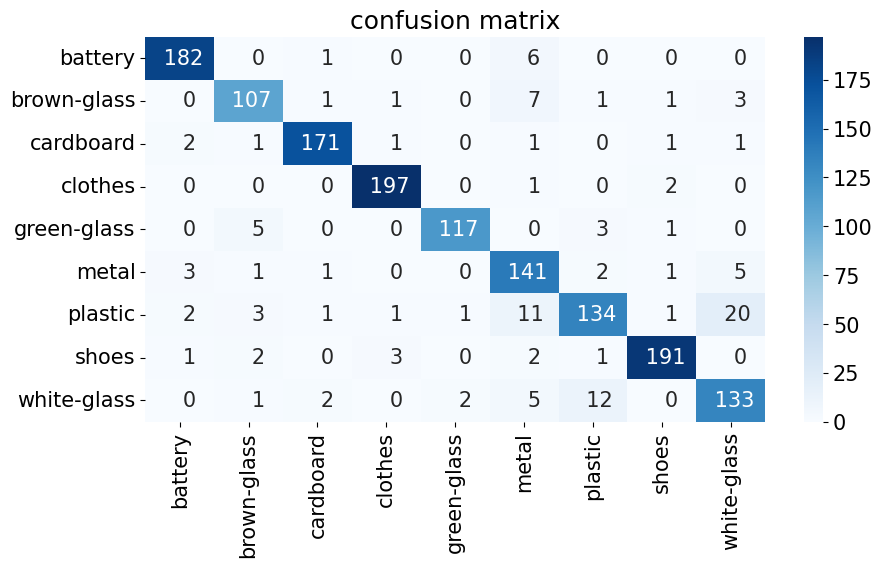

In [29]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size']=15
ax=sns.heatmap(data=confusion_matrix(y_true=actual,y_pred=pred),
               annot=True,
               fmt='4d',
               xticklabels=class_labels,
               yticklabels=class_labels,
               cmap=plt.cm.Blues)
plt.title(label='confusion matrix')
plt.show()

***model saving***

In [31]:
densenet_model.save("models/DenseNetLSTM_model.h5")

---